I thought it would be interesting to explore a dataset involved in wafer manufacturing.  I recently started working in IC test and wafer test is part of our responsibilities and I hope to gain some insights through exploration.

The dataset used can be found here:
    https://www.kaggle.com/datasets/arbazkhan971/anomaly-detection

There are 3 files:
Train.csv - Contains data with Class feature indicating anomoly was present.
Test.csv - Contains data without Class feature, I'm not sure how that helps?
Sample_submission.csv - Contains example submission as this was used for a competition.

The data seems to have been one-hot encoded, the features were obfuscated so I can't know for sure. 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore') 


In [4]:
train_df = pd.read_csv('data/Train.csv')

In [5]:
test_df = pd.read_csv('data/Test.csv')

In [6]:
sub_df = pd.read_csv('data/Sample_submission.csv')

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1763 entries, 0 to 1762
Columns: 1559 entries, feature_1 to Class
dtypes: float64(1), int64(1558)
memory usage: 21.0 MB


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 1558 entries, feature_1 to feature_1558
dtypes: float64(4), int64(1554)
memory usage: 9.0 MB


In [9]:
train_df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558,Class
0,100,160,1.6000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20,83,4.1500,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,99,150,1.5151,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,40,40,1.0000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12,234,19.5000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
sub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Class   756 non-null    float64
dtypes: float64(1)
memory usage: 6.0 KB


In [11]:
sub_df.value_counts()

Class
0.0      756
dtype: int64

In [12]:
train_df['Class'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1763 entries, 0 to 1762
Series name: Class
Non-Null Count  Dtype
--------------  -----
1763 non-null   int64
dtypes: int64(1)
memory usage: 13.9 KB


In [13]:
train_df['Class'].value_counts()

0    1620
1     143
Name: Class, dtype: int64

In [14]:
# Check the anomoly rate classification
train_df[train_df['Class'] == 1.0].shape[0] / train_df.shape[0]

0.08111174134997164

In [15]:
test_df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1549,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558
0,60.0,468.0,7.8000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,108.0,179.0,1.6574,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,1.0,2.0000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,60.0,468.0,7.8000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,60.0,120.0,2.0000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# Since there are so many features I'll try to look for things in the features programatically 
all_same = []
two_val = []
the_rest = []
for col in train_df:
    counts = train_df[col].value_counts()
    if (len(counts) <= 1):
        # All values the same wouldn't be useful
        all_same.append(col)
    elif (len(counts) == 2):
        # Just 2 values
        two_val.append(col)
    else:
        the_rest.append(col)
         
print('All same:')
print(len(all_same))
print(all_same)

print('Two values:')
print(len(two_val))
#print(two_val)

print('The rest:')
print(len(the_rest))
print(the_rest)

All same:
36
['feature_57', 'feature_82', 'feature_106', 'feature_147', 'feature_262', 'feature_278', 'feature_284', 'feature_320', 'feature_362', 'feature_372', 'feature_383', 'feature_435', 'feature_439', 'feature_488', 'feature_495', 'feature_522', 'feature_531', 'feature_553', 'feature_578', 'feature_591', 'feature_630', 'feature_631', 'feature_652', 'feature_894', 'feature_934', 'feature_978', 'feature_1038', 'feature_1063', 'feature_1096', 'feature_1185', 'feature_1211', 'feature_1243', 'feature_1247', 'feature_1341', 'feature_1367', 'feature_1407']
Two values:
1520
The rest:
3
['feature_1', 'feature_2', 'feature_3']


There are 1520 columns that only represent 2 values.  All features beyond the first 3.  
This gives rise to potentially duplicate columns that might bias the results in a model.
I read that a good way to remove duplicate features is to transpose then drop them, then transpose again.
I will compare this to the undropped version in the model performance because I'm not sure this is a good idea.


In [17]:
train_df_drop = train_df.transpose().drop_duplicates().transpose()
train_df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1763 entries, 0 to 1762
Columns: 730 entries, feature_1 to Class
dtypes: float64(730)
memory usage: 9.8 MB


In [18]:
train_df_drop['Class'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1763 entries, 0 to 1762
Series name: Class
Non-Null Count  Dtype  
--------------  -----  
1763 non-null   float64
dtypes: float64(1)
memory usage: 13.9 KB


Its good that it didn't drop the 'Class' features as a duplicate.  
However we dropped half the data!
If we are checking for outliers/anomolies then duplicate features would just slow things down?

I believe if this is one-hot encoded data there should be approximately an equal number of 1's in all rows.

In [19]:
train_df_drop.iloc[:,3:].head()

,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,...,feature_1549,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1557,feature_1558,Class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
row_sums = train_df_drop.iloc[:,3:].sum(axis=1)
row_sums

0        3.0
1       15.0
2        7.0
3        4.0
4        3.0
        ... 
1758     5.0
1759     5.0
1760     5.0
1761     5.0
1762    19.0
Length: 1763, dtype: float64

<AxesSubplot:ylabel='Count'>

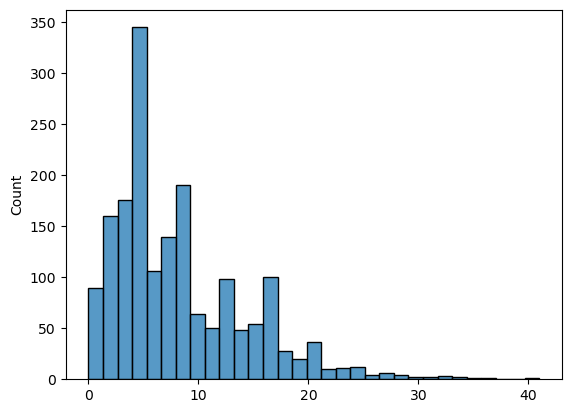

In [21]:
sns.histplot(row_sums)

<AxesSubplot:ylabel='Count'>

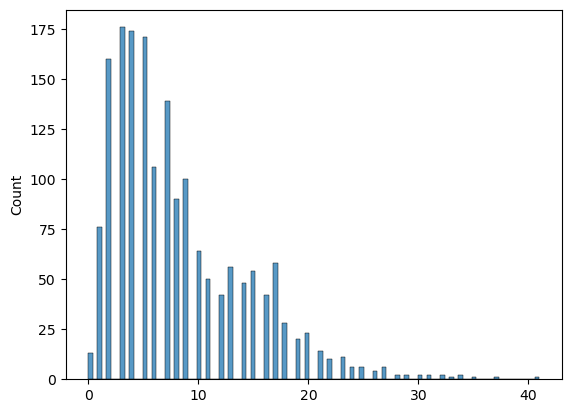

In [22]:
sns.histplot(row_sums, bins=100)

I'd say, at least half the data fits my assumptions about one-hot encoding.

In [23]:
# See if we can reduce the number of features using a decision tree.
X = train_df_drop.drop('Class', axis=1)
y = train_df_drop['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y)

0.9047619047619048


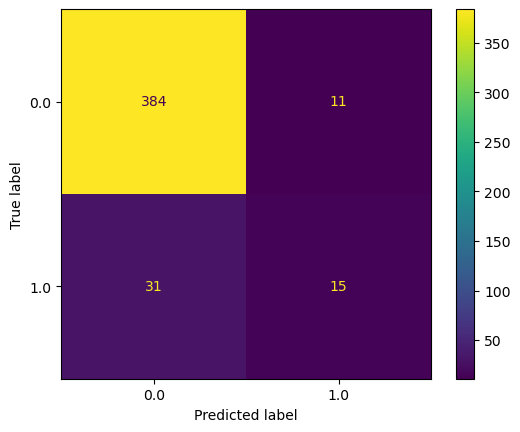

In [24]:
dr = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
print(dr.score(X_test, y_test))
preds = dr.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=dr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dr.classes_)
disp.plot()

In [25]:
X = train_df.drop('Class', axis=1)
y = train_df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y)

0.9160997732426304


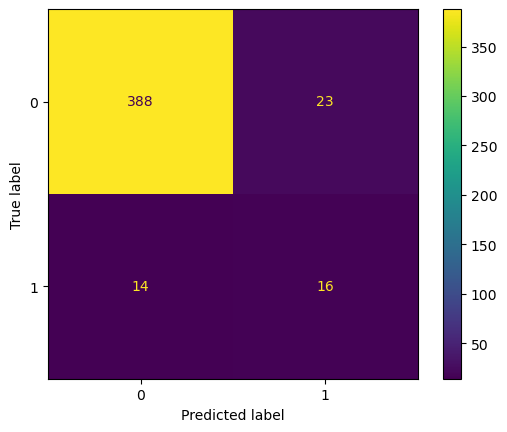

In [26]:
dr = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
print(dr.score(X_test, y_test))
preds = dr.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=dr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dr.classes_)
disp.plot()

Its difficult to tell if we can reduce the feature set at this point based on the duplicate columns.
There are too many missed predictions compared to good predctions for the class.

Try to find a good classifier using StandardScaler

In [27]:
 def execute_model(name, mdl, scale=True):
    if (scale):
        pipe = Pipeline([('scaler', StandardScaler()), ('model', mdl)])
    else:
        pipe = Pipeline([('model', mdl)])

    pipe.fit(X_train, y_train)
    score = pipe.score(X_test, y_test)
    preds = pipe.predict(X_test)
    cm = confusion_matrix(y_test, preds, labels=pipe['model'].classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe['model'].classes_)
    fig, ax = plt.subplots(figsize=(8,6))
    ax.set(title=name)
    disp.plot(ax = ax)


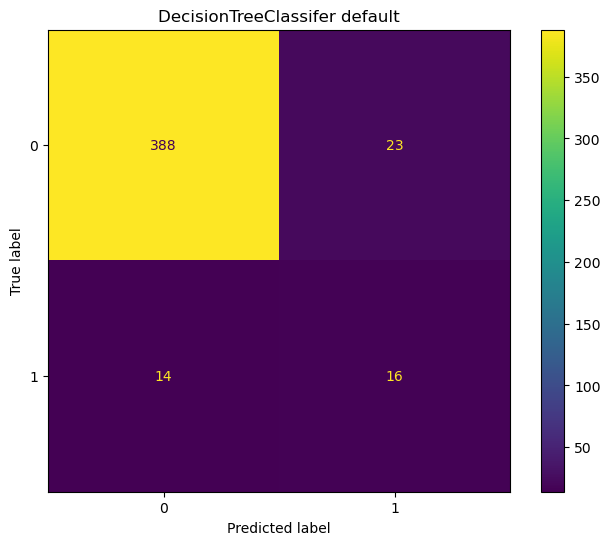

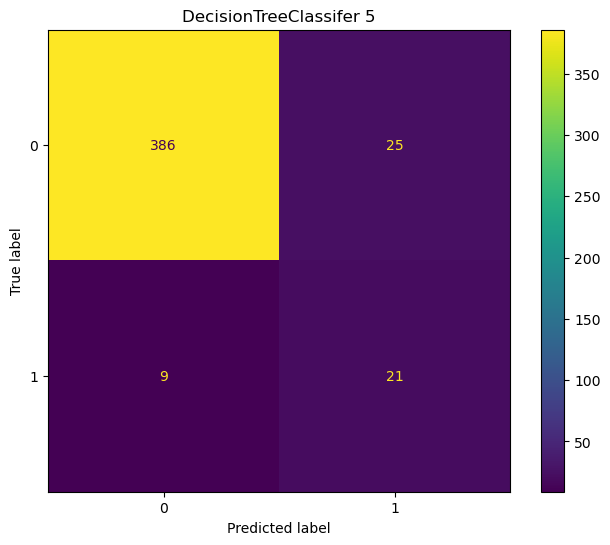

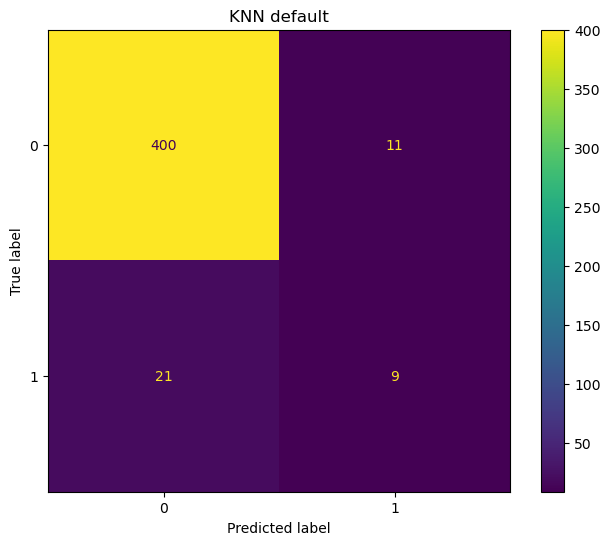

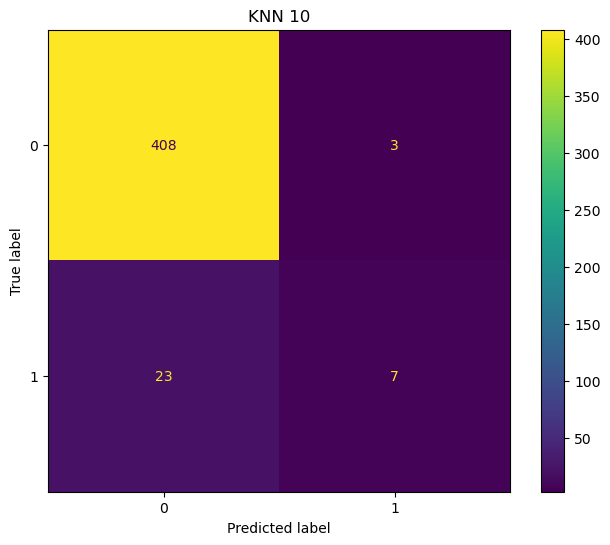

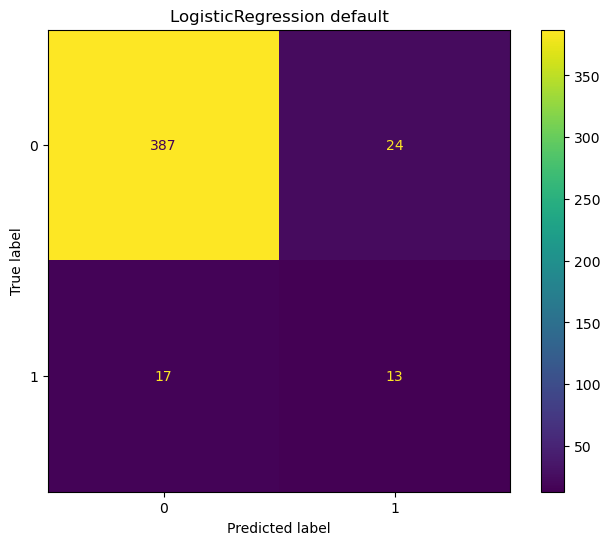

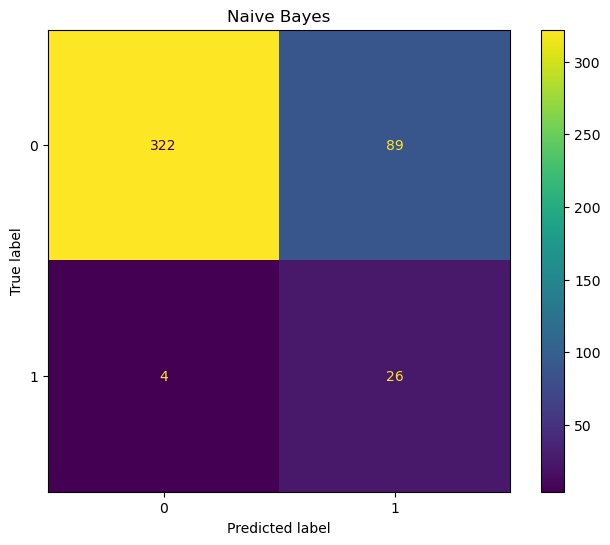

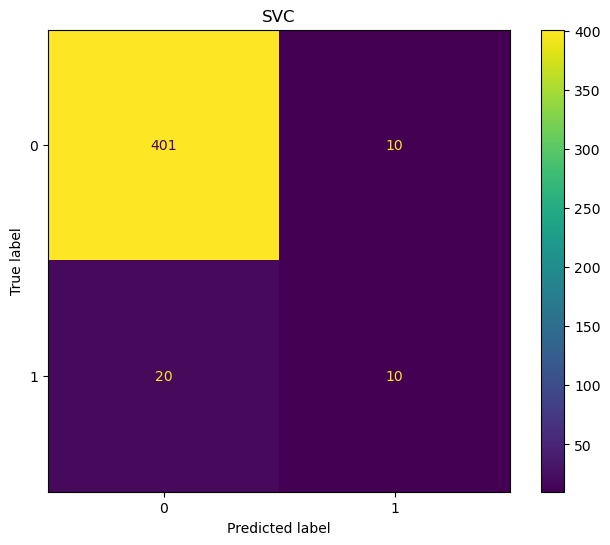

In [28]:
dt = DecisionTreeClassifier(random_state=42)
dt5 = DecisionTreeClassifier(max_depth=5, random_state=42)
knn = KNeighborsClassifier()
knn10 = KNeighborsClassifier(n_neighbors=10)
lgr = LogisticRegression()
mnb = MultinomialNB()
svc = SVC()
execute_model('DecisionTreeClassifer default', dt)
execute_model('DecisionTreeClassifer 5', dt5)
execute_model('KNN default', knn)
execute_model('KNN 10', knn10)
execute_model('LogisticRegression default', lgr)
execute_model('Naive Bayes', mnb, False)
execute_model('SVC', svc)

Results are not very good.
Try to reduce feature set with SequentialFeatureSelector


In [29]:
def select_feature(name, mdl, count=10, scale=True):
    if (scale):
        pipe = Pipeline([('scaler', StandardScaler()),  
                         ('selector', SequentialFeatureSelector(mdl, n_features_to_select=count)),
                         ('model', mdl)])
    else:
        pipe = Pipeline([ ('selector', SequentialFeatureSelector(mdl, n_features_to_select=count)),
                          ('model', mdl)])

    pipe.fit(X_train, y_train)
    score = pipe.score(X_test, y_test)
    preds = pipe.predict(X_test)
    sft = pipe['selector'].get_feature_names_out()
    print("Features:", sft)
    cm = confusion_matrix(y_test, preds, labels=pipe['model'].classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe['model'].classes_)
    fig, ax = plt.subplots(figsize=(8,6))
    ax.set(title=name)
    disp.plot(ax = ax)

In [31]:
# Too slow to run but for the little time I let it go I saw some features appear for multiple models
#select_feature('DecisionTreeClassifer default', dt)
#select_feature('DecisionTreeClassifer 5', dt5)
#select_feature('KNN default', knn)
#select_feature('KNN 10', knn10)
#select_feature('LogisticRegression default', lgr)
#select_feature('Naive Bayes', mnb, scale=False)
#select_feature('SVC', svc)

In [32]:
def grid_search(name, mdl, params, scale=True, scoring=None, cv=5):
    if (scale):
        pipe = Pipeline([('scaler', StandardScaler()),  
                         ('model', mdl)])
    else:
        pipe = Pipeline([ ('model', mdl)])

    grid = GridSearchCV(pipe, param_grid=params, verbose=3, scoring=scoring, cv=cv)
    #grid.fit(X_train, y_train)
    #score = grid.score(X_test, y_test)
    #preds = grid.predict(X_test)
    grid.fit(X, y)
    score = grid.score(X, y)
    preds = grid.predict(X)
    pipe = grid.best_estimator_
    print(pipe)
    #cm = confusion_matrix(y_test, preds, labels=pipe['model'].classes_)
    cm = confusion_matrix(y, preds, labels=pipe['model'].classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe['model'].classes_)
    fig, ax = plt.subplots(figsize=(8,6))
    ax.set(title=name)
    disp.plot(ax = ax)
    return score

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END ................model__max_depth=1;, score=0.379 total time=   0.0s
[CV 2/5] END ................model__max_depth=1;, score=0.241 total time=   0.0s
[CV 3/5] END ................model__max_depth=1;, score=0.000 total time=   0.0s
[CV 4/5] END ................model__max_depth=1;, score=0.429 total time=   0.0s
[CV 5/5] END ................model__max_depth=1;, score=0.429 total time=   0.0s
[CV 1/5] END ................model__max_depth=2;, score=0.345 total time=   0.0s
[CV 2/5] END ................model__max_depth=2;, score=0.207 total time=   0.0s
[CV 3/5] END ................model__max_depth=2;, score=0.069 total time=   0.0s
[CV 4/5] END ................model__max_depth=2;, score=0.429 total time=   0.0s
[CV 5/5] END ................model__max_depth=2;, score=0.357 total time=   0.0s
[CV 1/5] END ................model__max_depth=5;, score=0.310 total time=   0.0s
[CV 2/5] END ................model__max_depth=5;,

0.7902097902097902

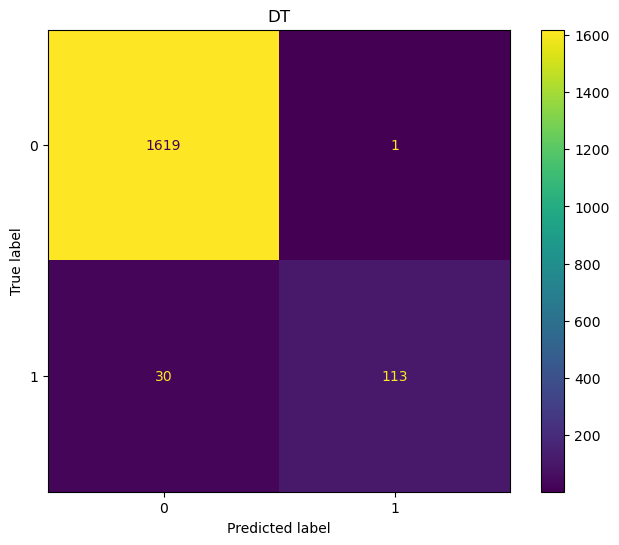

In [33]:
dt_params = {'model__max_depth': [1, 2, 5, 10, 15, 20, 50, 100] }
grid_search('DT', dt, dt_params, False, scoring='recall')

In [ ]:
knn_params = {'model__n_neighbors' : [5, 10, 15, 20, 50, 100]}
grid_search('KNN', knn, knn_params, True, scoring='recall')

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END model__gamma=0.1, model__kernel=rbf;, score=0.103 total time=   1.6s
[CV 2/5] END model__gamma=0.1, model__kernel=rbf;, score=0.034 total time=   1.4s
[CV 3/5] END model__gamma=0.1, model__kernel=rbf;, score=0.034 total time=   1.3s
[CV 4/5] END model__gamma=0.1, model__kernel=rbf;, score=0.036 total time=   1.3s
[CV 5/5] END model__gamma=0.1, model__kernel=rbf;, score=0.179 total time=   1.4s
[CV 1/5] END model__gamma=0.1, model__kernel=linear;, score=0.414 total time=   8.2s
[CV 2/5] END model__gamma=0.1, model__kernel=linear;, score=0.241 total time=   5.9s
[CV 3/5] END model__gamma=0.1, model__kernel=linear;, score=0.310 total time=   6.8s
[CV 4/5] END model__gamma=0.1, model__kernel=linear;, score=0.500 total time=   9.1s
[CV 5/5] END model__gamma=0.1, model__kernel=linear;, score=0.321 total time=   7.1s
[CV 1/5] END model__gamma=1.0, model__kernel=rbf;, score=0.000 total time=   1.5s
[CV 2/5] END model__gam

0.7202797202797203

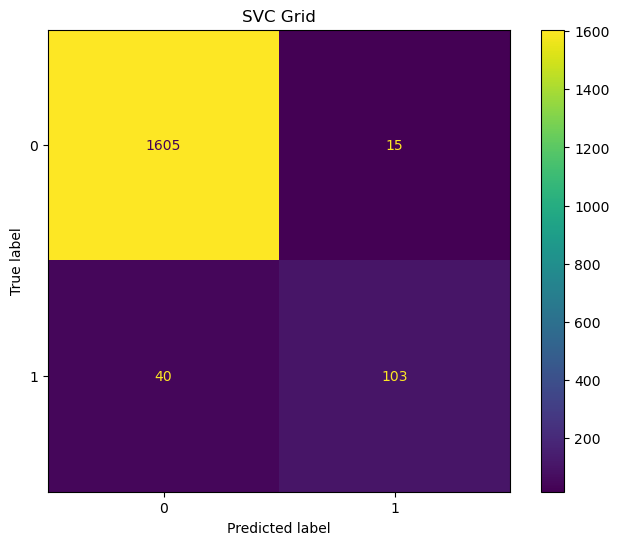

In [35]:
svc_params = {'model__kernel': ['rbf', 'linear'],
         'model__gamma': [0.1, 1.0, 10.0, 100.0],}
grid_search('SVC Grid', svc, svc_params, scale=False, scoring='recall')


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END ...............model__alpha=0.0001;, score=0.862 total time=   0.0s
[CV 2/5] END ...............model__alpha=0.0001;, score=0.655 total time=   0.0s
[CV 3/5] END ...............model__alpha=0.0001;, score=0.690 total time=   0.0s
[CV 4/5] END ...............model__alpha=0.0001;, score=0.821 total time=   0.0s
[CV 5/5] END ...............model__alpha=0.0001;, score=0.679 total time=   0.0s
[CV 1/5] END ................model__alpha=0.001;, score=0.862 total time=   0.0s
[CV 2/5] END ................model__alpha=0.001;, score=0.655 total time=   0.0s
[CV 3/5] END ................model__alpha=0.001;, score=0.724 total time=   0.0s
[CV 4/5] END ................model__alpha=0.001;, score=0.857 total time=   0.0s
[CV 5/5] END ................model__alpha=0.001;, score=0.786 total time=   0.0s
[CV 1/5] END .................model__alpha=0.01;, score=0.862 total time=   0.0s
[CV 2/5] END .................model__alpha=0.01;,

0.8391608391608392

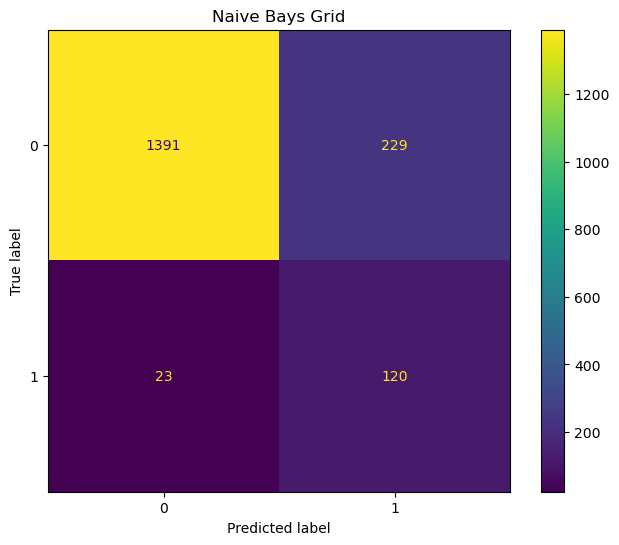

In [36]:
mnb_params = {'model__alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 200.0],}
grid_search('Naive Bays Grid', mnb, mnb_params, scale=False, scoring='recall')


Create a table of the results with different scoring techniques.

In [37]:
results = []
model_names = ['DT', 'KNN', 'SVT', 'NB']
scoring = ['recall', 'precision', 'f1', 'roc_auc']
models = [dt, knn, svc, mnb]
params = [dt_params, knn_params, svc_params, mnb_params]
scale = [False, False, False, False]


In [ ]:

for j in range(len(model_names)):
    scores = ['model_name']
    for i in range(len(scoring)):
        score = grid_search(model_names[j], models[j], params[j], scale=scale[j], scoring=scoring[i], cv=10)
        scores.append(score)
    results.append(scores)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
[CV 1/10] END ...............model__max_depth=1;, score=0.467 total time=   0.0s
[CV 2/10] END ...............model__max_depth=1;, score=0.267 total time=   0.0s
[CV 3/10] END ...............model__max_depth=1;, score=0.333 total time=   0.0s
[CV 4/10] END ...............model__max_depth=1;, score=0.143 total time=   0.0s
[CV 5/10] END ...............model__max_depth=1;, score=0.357 total time=   0.0s
[CV 6/10] END ...............model__max_depth=1;, score=0.357 total time=   0.0s
[CV 7/10] END ...............model__max_depth=1;, score=0.429 total time=   0.0s
[CV 8/10] END ...............model__max_depth=1;, score=0.429 total time=   0.0s
[CV 9/10] END ...............model__max_depth=1;, score=0.357 total time=   0.0s
[CV 10/10] END ..............model__max_depth=1;, score=0.500 total time=   0.0s
[CV 1/10] END ...............model__max_depth=2;, score=0.400 total time=   0.0s
[CV 2/10] END ...............model__max_depth=2;

[CV 1/10] END ...............model__max_depth=5;, score=0.545 total time=   0.0s
[CV 2/10] END ...............model__max_depth=5;, score=0.375 total time=   0.0s
[CV 3/10] END ...............model__max_depth=5;, score=0.429 total time=   0.0s
[CV 4/10] END ...............model__max_depth=5;, score=0.167 total time=   0.0s
[CV 5/10] END ...............model__max_depth=5;, score=0.429 total time=   0.0s
[CV 6/10] END ...............model__max_depth=5;, score=0.600 total time=   0.0s
[CV 7/10] END ...............model__max_depth=5;, score=0.857 total time=   0.0s
[CV 8/10] END ...............model__max_depth=5;, score=0.400 total time=   0.0s
[CV 9/10] END ...............model__max_depth=5;, score=0.571 total time=   0.0s
[CV 10/10] END ..............model__max_depth=5;, score=0.462 total time=   0.0s
[CV 1/10] END ..............model__max_depth=10;, score=0.500 total time=   0.0s
[CV 2/10] END ..............model__max_depth=10;, score=0.300 total time=   0.0s
[CV 3/10] END ..............

[CV 1/10] END ..............model__max_depth=15;, score=0.400 total time=   0.0s
[CV 2/10] END ..............model__max_depth=15;, score=0.222 total time=   0.0s
[CV 3/10] END ..............model__max_depth=15;, score=0.308 total time=   0.0s
[CV 4/10] END ..............model__max_depth=15;, score=0.188 total time=   0.0s
[CV 5/10] END ..............model__max_depth=15;, score=0.400 total time=   0.0s
[CV 6/10] END ..............model__max_depth=15;, score=0.222 total time=   0.0s
[CV 7/10] END ..............model__max_depth=15;, score=0.538 total time=   0.0s
[CV 8/10] END ..............model__max_depth=15;, score=0.333 total time=   0.0s
[CV 9/10] END ..............model__max_depth=15;, score=0.231 total time=   0.0s
[CV 10/10] END .............model__max_depth=15;, score=0.357 total time=   0.0s
[CV 1/10] END ..............model__max_depth=20;, score=0.429 total time=   0.0s
[CV 2/10] END ..............model__max_depth=20;, score=0.286 total time=   0.0s
[CV 3/10] END ..............

[CV 1/10] END ..............model__max_depth=50;, score=0.685 total time=   0.1s
[CV 2/10] END ..............model__max_depth=50;, score=0.664 total time=   0.1s
[CV 3/10] END ..............model__max_depth=50;, score=0.603 total time=   0.1s
[CV 4/10] END ..............model__max_depth=50;, score=0.573 total time=   0.0s
[CV 5/10] END ..............model__max_depth=50;, score=0.589 total time=   0.1s
[CV 6/10] END ..............model__max_depth=50;, score=0.550 total time=   0.0s
[CV 7/10] END ..............model__max_depth=50;, score=0.767 total time=   0.1s
[CV 8/10] END ..............model__max_depth=50;, score=0.758 total time=   0.1s
[CV 9/10] END ..............model__max_depth=50;, score=0.613 total time=   0.1s
[CV 10/10] END .............model__max_depth=50;, score=0.571 total time=   0.0s
[CV 1/10] END .............model__max_depth=100;, score=0.685 total time=   0.0s
[CV 2/10] END .............model__max_depth=100;, score=0.664 total time=   0.0s
[CV 3/10] END .............m

Pipeline(steps=[('model', KNeighborsClassifier(n_neighbors=1))])
Fitting 10 folds for each of 8 candidates, totalling 80 fits
[CV 1/10] END .............model__n_neighbors=1;, score=0.429 total time=   0.0s
[CV 2/10] END .............model__n_neighbors=1;, score=0.222 total time=   0.0s
[CV 3/10] END .............model__n_neighbors=1;, score=0.417 total time=   0.0s
[CV 4/10] END .............model__n_neighbors=1;, score=0.214 total time=   0.0s
[CV 5/10] END .............model__n_neighbors=1;, score=0.333 total time=   0.0s
[CV 6/10] END .............model__n_neighbors=1;, score=0.455 total time=   0.0s
[CV 7/10] END .............model__n_neighbors=1;, score=0.545 total time=   0.0s
[CV 8/10] END .............model__n_neighbors=1;, score=0.538 total time=   0.0s
[CV 9/10] END .............model__n_neighbors=1;, score=0.308 total time=   0.0s
[CV 10/10] END ............model__n_neighbors=1;, score=0.429 total time=   0.0s
[CV 1/10] END .............model__n_neighbors=2;, score=0.500 to

[CV 1/10] END .............model__n_neighbors=5;, score=0.455 total time=   0.0s
[CV 2/10] END .............model__n_neighbors=5;, score=0.200 total time=   0.0s
[CV 3/10] END .............model__n_neighbors=5;, score=0.273 total time=   0.0s
[CV 4/10] END .............model__n_neighbors=5;, score=0.308 total time=   0.0s
[CV 5/10] END .............model__n_neighbors=5;, score=0.444 total time=   0.0s
[CV 6/10] END .............model__n_neighbors=5;, score=0.250 total time=   0.0s
[CV 7/10] END .............model__n_neighbors=5;, score=0.222 total time=   0.0s
[CV 8/10] END .............model__n_neighbors=5;, score=0.435 total time=   0.0s
[CV 9/10] END .............model__n_neighbors=5;, score=0.182 total time=   0.0s
[CV 10/10] END ............model__n_neighbors=5;, score=0.357 total time=   0.0s
[CV 1/10] END ............model__n_neighbors=10;, score=0.211 total time=   0.0s
[CV 2/10] END ............model__n_neighbors=10;, score=0.190 total time=   0.0s
[CV 3/10] END ............mo

[CV 4/10] END ............model__n_neighbors=15;, score=0.816 total time=   0.0s
[CV 5/10] END ............model__n_neighbors=15;, score=0.830 total time=   0.0s
[CV 6/10] END ............model__n_neighbors=15;, score=0.785 total time=   0.0s
[CV 7/10] END ............model__n_neighbors=15;, score=0.893 total time=   0.0s
[CV 8/10] END ............model__n_neighbors=15;, score=0.927 total time=   0.0s
[CV 9/10] END ............model__n_neighbors=15;, score=0.822 total time=   0.0s
[CV 10/10] END ...........model__n_neighbors=15;, score=0.881 total time=   0.0s
[CV 1/10] END ............model__n_neighbors=20;, score=0.899 total time=   0.0s
[CV 2/10] END ............model__n_neighbors=20;, score=0.887 total time=   0.0s
[CV 3/10] END ............model__n_neighbors=20;, score=0.863 total time=   0.0s
[CV 4/10] END ............model__n_neighbors=20;, score=0.811 total time=   0.0s
[CV 5/10] END ............model__n_neighbors=20;, score=0.838 total time=   0.0s
[CV 6/10] END ............mo

In [ ]:
df = pd.DataFrame(results, columns=['Model'] + scoring)
df

In [ ]:
df['Model'] = model_names
df

# Conclusion
Seems the KNN using 'recall' score gives the best results.